# Data Understanding

Notebook ini berisi analisis pemahaman data untuk dataset Iris klasik yang akan digunakan untuk klasifikasi spesies bunga iris.

## 1. Import Library dan Load Dataset

In [75]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Atur style untuk visualisasi
plt.style.use('default')
sns.set_palette("husl")

print("Library berhasil diimport")

Library berhasil diimport


In [76]:
# Load dataset Iris dari file CSV
df = pd.read_csv('data_iris.csv', delimiter=';')

# Konversi kolom numerik yang menggunakan koma sebagai decimal separator
numeric_columns = ['sepal length', 'sepal width', 'petal length', 'petal width']

for col in numeric_columns:
    if col in df.columns:
        # Konversi koma ke titik untuk decimal
        df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

# Buat kolom species numerik dan species name
df['species'] = df['Class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
# df['species_name'] = df['Class'].map({'Iris-setosa': 'setosa', 'Iris-versicolor': 'versicolor', 'Iris-virginica': 'virginica'})

# Rename kolom untuk konsistensi dengan format sklearn
df = df.rename(columns={
    'sepal length': 'sepal length (cm)',
    'sepal width': 'sepal width (cm)', 
    'petal length': 'petal length (cm)',
    'petal width': 'petal width (cm)'
})

print("Dataset Iris berhasil dimuat dari data_iris.csv")
print(f"Ukuran dataset: {df.shape[0]} baris, {df.shape[1]} kolom")
df.head()

Dataset Iris berhasil dimuat dari data_iris.csv
Ukuran dataset: 150 baris, 7 kolom


,id,Class,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,1,Iris-setosa,5.1,3.5,1.4,0.2,0
1,2,Iris-setosa,4.9,3.0,1.4,0.2,0
2,3,Iris-setosa,4.7,3.2,1.3,0.2,0
3,4,Iris-setosa,4.6,3.1,1.5,0.2,0
4,5,Iris-setosa,5.0,3.6,1.4,0.2,0


## 2. Informasi Dasar Dataset

In [77]:
# Informasi umum dataset
print("=== INFORMASI DATASET IRIS ===")
print(f"Jumlah sampel: {len(df)}")
print(f"Jumlah fitur: {len(df.columns)-2} (tanpa target)")
print(f"Jumlah kelas: {df['species'].nunique()}")
print("\n=== INFO DATAFRAME ===")
df.info()

=== INFORMASI DATASET IRIS ===
Jumlah sampel: 150
Jumlah fitur: 5 (tanpa target)
Jumlah kelas: 3

=== INFO DATAFRAME ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 150 non-null    int64  
 1   Class              150 non-null    object 
 2   sepal length (cm)  150 non-null    float64
 3   sepal width (cm)   150 non-null    float64
 4   petal length (cm)  150 non-null    float64
 5   petal width (cm)   150 non-null    float64
 6   species            150 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 8.3+ KB


In [78]:
# Deskripsi variabel
print("=== DESKRIPSI VARIABEL ===")
print("\n Fitur-fitur dalam dataset:")
feature_descriptions = {
    'sepal length (cm)': 'Panjang sepal (kelopak bunga) dalam cm',
    'sepal width (cm)': 'Lebar sepal (kelopak bunga) dalam cm', 
    'petal length (cm)': 'Panjang petal (mahkota bunga) dalam cm',
    'petal width (cm)': 'Lebar petal (mahkota bunga) dalam cm'
}

for feature, description in feature_descriptions.items():
    print(f"• {feature}: {description}")
    
print("\n Target variable:")
print("• species: Spesies bunga iris (setosa, versicolor, virginica)")

=== DESKRIPSI VARIABEL ===

 Fitur-fitur dalam dataset:
• sepal length (cm): Panjang sepal (kelopak bunga) dalam cm
• sepal width (cm): Lebar sepal (kelopak bunga) dalam cm
• petal length (cm): Panjang petal (mahkota bunga) dalam cm
• petal width (cm): Lebar petal (mahkota bunga) dalam cm

 Target variable:
• species: Spesies bunga iris (setosa, versicolor, virginica)


## 3. Mengecek Tipe Data dan Jenis Variabel

In [79]:
# Analisis jenis variabel berdasarkan klasifikasi
print("=== KLASIFIKASI JENIS VARIABEL ===")
print("\n Teori Jenis Variabel:")
print("• Quantitative (Numerik): Nilai angka, bisa dihitung")
print("• Qualitative (Kategorikal/Faktor): Klasifikasi atau kategori")
print("• Discrete: Nilai terpisah (tanpa nilai antara)")
print("• Continuous: Nilai kontinu (bisa pecahan)")

print("\n" + "="*60)
print("            ANALISIS VARIABEL DATASET IRIS")
print("="*60)

# Analisis setiap variabel
variable_analysis = {
    'sepal length (cm)': {
        'tipe_data': str(df['sepal length (cm)'].dtype),
        'jenis_variabel': 'Quantitative (Numerik)',
        'sub_kategori': 'Continuous',
        'deskripsi': 'Nilai kontinu, bisa berupa pecahan',
        'contoh_nilai': df['sepal length (cm)'].head(3).tolist(),
        'rentang': f"{df['sepal length (cm)'].min():.1f} - {df['sepal length (cm)'].max():.1f} cm"
    },
    'sepal width (cm)': {
        'tipe_data': str(df['sepal width (cm)'].dtype),
        'jenis_variabel': 'Quantitative (Numerik)',
        'sub_kategori': 'Continuous',
        'deskripsi': 'Nilai kontinu, bisa berupa pecahan',
        'contoh_nilai': df['sepal width (cm)'].head(3).tolist(),
        'rentang': f"{df['sepal width (cm)'].min():.1f} - {df['sepal width (cm)'].max():.1f} cm"
    },
    'petal length (cm)': {
        'tipe_data': str(df['petal length (cm)'].dtype),
        'jenis_variabel': 'Quantitative (Numerik)',
        'sub_kategori': 'Continuous',
        'deskripsi': 'Nilai kontinu, bisa berupa pecahan',
        'contoh_nilai': df['petal length (cm)'].head(3).tolist(),
        'rentang': f"{df['petal length (cm)'].min():.1f} - {df['petal length (cm)'].max():.1f} cm"
    },
    'petal width (cm)': {
        'tipe_data': str(df['petal width (cm)'].dtype),
        'jenis_variabel': 'Quantitative (Numerik)',
        'sub_kategori': 'Continuous',
        'deskripsi': 'Nilai kontinu, bisa berupa pecahan',
        'contoh_nilai': df['petal width (cm)'].head(3).tolist(),
        'rentang': f"{df['petal width (cm)'].min():.1f} - {df['petal width (cm)'].max():.1f} cm"
    },
    'species': {
        'tipe_data': str(df['species'].dtype),
        'jenis_variabel': 'Qualitative (Kategorikal)',
        'sub_kategori': 'Discrete (Nominal)',
        'deskripsi': 'Kategori terpisah, tidak ada urutan',
        'contoh_nilai': df['species'].unique().tolist(),
        'rentang': f"{df['species'].nunique()} kategori (0, 1, 2)"
    },
}

# Tampilkan analisis setiap variabel
for i, (var_name, analysis) in enumerate(variable_analysis.items(), 1):
    print(f"\n{i}.  VARIABEL: {var_name.upper()}")
    print(f"   • Tipe Data: {analysis['tipe_data']}")
    print(f"   • Jenis Variabel: {analysis['jenis_variabel']}")
    print(f"   • Sub-kategori: {analysis['sub_kategori']}")
    print(f"   • Deskripsi: {analysis['deskripsi']}")
    print(f"   • Contoh nilai: {analysis['contoh_nilai']}")
    print(f"   • Rentang: {analysis['rentang']}")
    print("   " + "-"*40)

=== KLASIFIKASI JENIS VARIABEL ===

 Teori Jenis Variabel:
• Quantitative (Numerik): Nilai angka, bisa dihitung
• Qualitative (Kategorikal/Faktor): Klasifikasi atau kategori
• Discrete: Nilai terpisah (tanpa nilai antara)
• Continuous: Nilai kontinu (bisa pecahan)

            ANALISIS VARIABEL DATASET IRIS

1.  VARIABEL: SEPAL LENGTH (CM)
   • Tipe Data: float64
   • Jenis Variabel: Quantitative (Numerik)
   • Sub-kategori: Continuous
   • Deskripsi: Nilai kontinu, bisa berupa pecahan
   • Contoh nilai: [5.1, 4.9, 4.7]
   • Rentang: 4.3 - 7.9 cm
   ----------------------------------------

2.  VARIABEL: SEPAL WIDTH (CM)
   • Tipe Data: float64
   • Jenis Variabel: Quantitative (Numerik)
   • Sub-kategori: Continuous
   • Deskripsi: Nilai kontinu, bisa berupa pecahan
   • Contoh nilai: [3.5, 3.0, 3.2]
   • Rentang: 2.0 - 4.4 cm
   ----------------------------------------

3.  VARIABEL: PETAL LENGTH (CM)
   • Tipe Data: float64
   • Jenis Variabel: Quantitative (Numerik)
   • Sub-katego

In [80]:
# Buat tabel ringkasan jenis variabel
print("\n=== TABEL RINGKASAN JENIS VARIABEL ===")

# Buat DataFrame untuk ringkasan
summary_data = []
for var_name, analysis in variable_analysis.items():
    summary_data.append({
        'Nama Variabel': var_name,
        'Tipe Data': analysis['tipe_data'],
        'Jenis Variabel': analysis['jenis_variabel'],
        'Sub-kategori': analysis['sub_kategori'],
        'Rentang/Kategori': analysis['rentang']
    })

summary_df = pd.DataFrame(summary_data)
print("\n Tabel Ringkasan:")
print(summary_df.to_string(index=False))


=== TABEL RINGKASAN JENIS VARIABEL ===

 Tabel Ringkasan:
    Nama Variabel Tipe Data            Jenis Variabel       Sub-kategori     Rentang/Kategori
sepal length (cm)   float64    Quantitative (Numerik)         Continuous         4.3 - 7.9 cm
 sepal width (cm)   float64    Quantitative (Numerik)         Continuous         2.0 - 4.4 cm
petal length (cm)   float64    Quantitative (Numerik)         Continuous         1.0 - 6.9 cm
 petal width (cm)   float64    Quantitative (Numerik)         Continuous         0.1 - 2.5 cm
          species     int64 Qualitative (Kategorikal) Discrete (Nominal) 3 kategori (0, 1, 2)


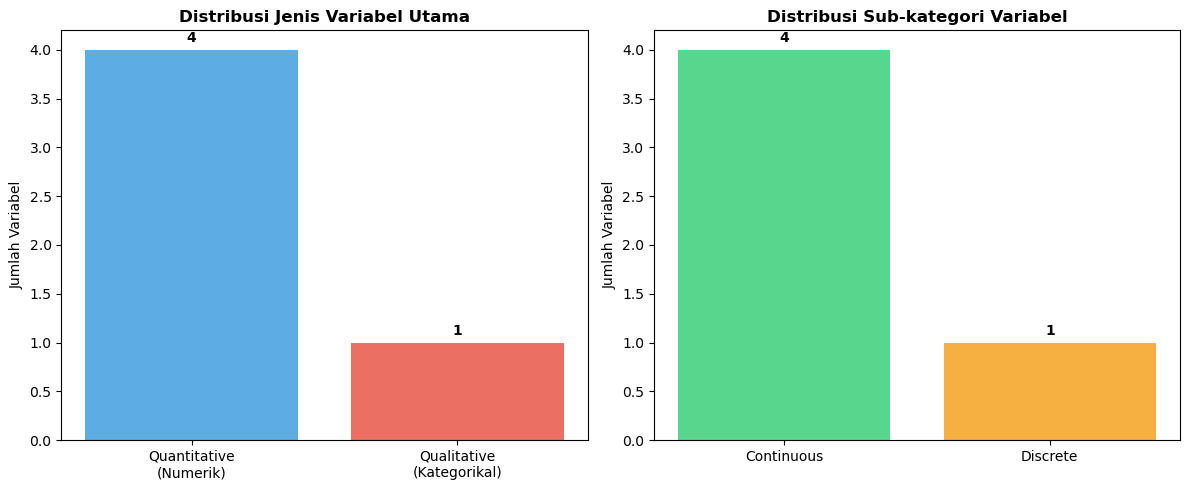

In [81]:
# Visualisasi distribusi tipe variabel
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Hitung jumlah setiap jenis variabel
quantitative_count = sum(1 for analysis in variable_analysis.values() 
                        if 'Quantitative' in analysis['jenis_variabel'])
qualitative_count = sum(1 for analysis in variable_analysis.values() 
                       if 'Qualitative' in analysis['jenis_variabel'])

continuous_count = sum(1 for analysis in variable_analysis.values() 
                      if 'Continuous' in analysis['sub_kategori'])
discrete_count = sum(1 for analysis in variable_analysis.values() 
                    if 'Discrete' in analysis['sub_kategori'])

# Plot 1: Jenis Variabel Utama
categories = ['Quantitative\n(Numerik)', 'Qualitative\n(Kategorikal)']
counts = [quantitative_count, qualitative_count]
colors = ['#3498db', '#e74c3c']

bars1 = axes[0].bar(categories, counts, color=colors, alpha=0.8)
axes[0].set_title('Distribusi Jenis Variabel Utama', fontweight='bold')
axes[0].set_ylabel('Jumlah Variabel')

# Tambahkan nilai di atas bar
for bar, count in zip(bars1, counts):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
                str(count), ha='center', va='bottom', fontweight='bold')

# Plot 2: Sub-kategori
subcategories = ['Continuous', 'Discrete']
subcounts = [continuous_count, discrete_count]
subcolors = ['#2ecc71', '#f39c12']

bars2 = axes[1].bar(subcategories, subcounts, color=subcolors, alpha=0.8)
axes[1].set_title('Distribusi Sub-kategori Variabel', fontweight='bold')
axes[1].set_ylabel('Jumlah Variabel')

# Tambahkan nilai di atas bar
for bar, count in zip(bars2, subcounts):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
                str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [82]:
# Insight dan kesimpulan tipe data
print("\n" + "="*70)
print("                🔍 INSIGHT JENIS VARIABEL")
print("="*70)

print(f"\n RINGKASAN STATISTIK TIPE VARIABEL:")
print(f"   • Total variabel: {len(variable_analysis)}")
print(f"   • Quantitative (Numerik): {quantitative_count} variabel")
print(f"   • Qualitative (Kategorikal): {qualitative_count} variabel")
print(f"   • Continuous: {continuous_count} variabel")
print(f"   • Discrete: {discrete_count} variabel")

print(f"\n KARAKTERISTIK DATASET:")
print(f"   • Dataset didominasi oleh variabel numerik continuous (fitur pengukuran)")
print(f"   • Semua fitur prediktif adalah quantitative continuous")
print(f"   • Target variable bersifat qualitative discrete (kategori)")
print(f"   • Cocok untuk algoritma machine learning supervised")

print(f"\n IMPLIKASI UNTUK ANALISIS:")
print(f"   • Dapat menggunakan statistik deskriptif (mean, std, dll)")
print(f"   • Perlu normalisasi/standardisasi untuk beberapa algoritma")
print(f"   • Target encoding sudah tersedia (numerik dan nama)")
print(f"   • Siap untuk analisis korelasi dan visualisasi scatter plot")

print("\n" + "="*70)


                🔍 INSIGHT JENIS VARIABEL

 RINGKASAN STATISTIK TIPE VARIABEL:
   • Total variabel: 5
   • Quantitative (Numerik): 4 variabel
   • Qualitative (Kategorikal): 1 variabel
   • Continuous: 4 variabel
   • Discrete: 1 variabel

 KARAKTERISTIK DATASET:
   • Dataset didominasi oleh variabel numerik continuous (fitur pengukuran)
   • Semua fitur prediktif adalah quantitative continuous
   • Target variable bersifat qualitative discrete (kategori)
   • Cocok untuk algoritma machine learning supervised

 IMPLIKASI UNTUK ANALISIS:
   • Dapat menggunakan statistik deskriptif (mean, std, dll)
   • Perlu normalisasi/standardisasi untuk beberapa algoritma
   • Target encoding sudah tersedia (numerik dan nama)
   • Siap untuk analisis korelasi dan visualisasi scatter plot



## 4. Eksplorasi Data Awal

In [83]:
# Statistik deskriptif
print("=== STATISTIK DESKRIPTIF ===")
stats = df.describe()
print(stats.round(2))

=== STATISTIK DESKRIPTIF ===
           id  sepal length (cm)  sepal width (cm)  petal length (cm)  \
count  150.00             150.00            150.00             150.00   
mean    75.50               5.84              3.05               3.76   
std     43.45               0.83              0.43               1.76   
min      1.00               4.30              2.00               1.00   
25%     38.25               5.10              2.80               1.60   
50%     75.50               5.80              3.00               4.35   
75%    112.75               6.40              3.30               5.10   
max    150.00               7.90              4.40               6.90   

       petal width (cm)  species  
count            150.00   150.00  
mean               1.20     1.00  
std                0.76     0.82  
min                0.10     0.00  
25%                0.30     0.00  
50%                1.30     1.00  
75%                1.80     2.00  
max                2.50     2.00 

In [84]:
# Distribusi kelas
print("=== DISTRIBUSI KELAS ===")
class_counts = df['species'].value_counts()
print(class_counts)
print("\n Persentase:")
class_percentage = df['species'].value_counts(normalize=True) * 100
for species, percentage in class_percentage.items():
    print(f"• {species}: {percentage:.1f}%")

=== DISTRIBUSI KELAS ===
species
0    50
1    50
2    50
Name: count, dtype: int64

 Persentase:
• 0: 33.3%
• 1: 33.3%
• 2: 33.3%


In [85]:
# Cek missing values
print("=== CEK MISSING VALUES ===")
missing_values = df.isnull().sum()
print(missing_values)

if missing_values.sum() == 0:
    print("\n Dataset tidak memiliki missing values")
else:
    print(f"\n Total missing values: {missing_values.sum()}")

=== CEK MISSING VALUES ===
id                   0
Class                0
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

 Dataset tidak memiliki missing values


In [86]:
# Cek duplikasi data
print("=== CEK DUPLIKASI DATA ===")
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

if duplicates == 0:
    print(" Tidak ada data duplikat")
else:
    print(f" Terdapat {duplicates} baris duplikat")

=== CEK DUPLIKASI DATA ===
Jumlah baris duplikat: 0
 Tidak ada data duplikat


## 5. Analisis Distribusi Data

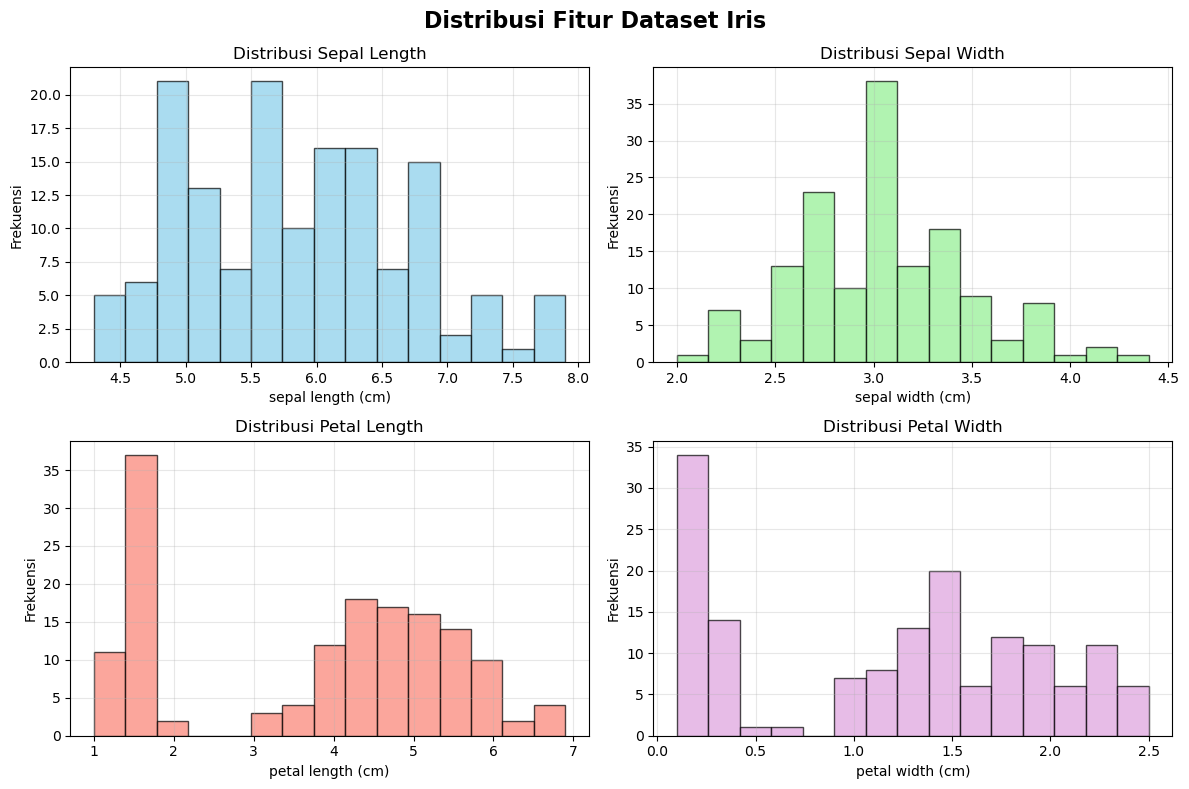

In [87]:
# Visualisasi distribusi fitur
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Distribusi Fitur Dataset Iris', fontsize=16, fontweight='bold')

features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
colors = ['skyblue', 'lightgreen', 'salmon', 'plum']

for i, (feature, color) in enumerate(zip(features, colors)):
    row = i // 2
    col = i % 2
    
    axes[row, col].hist(df[feature], bins=15, color=color, alpha=0.7, edgecolor='black')
    axes[row, col].set_title(f'Distribusi {feature.split("(")[0].strip().title()}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frekuensi')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

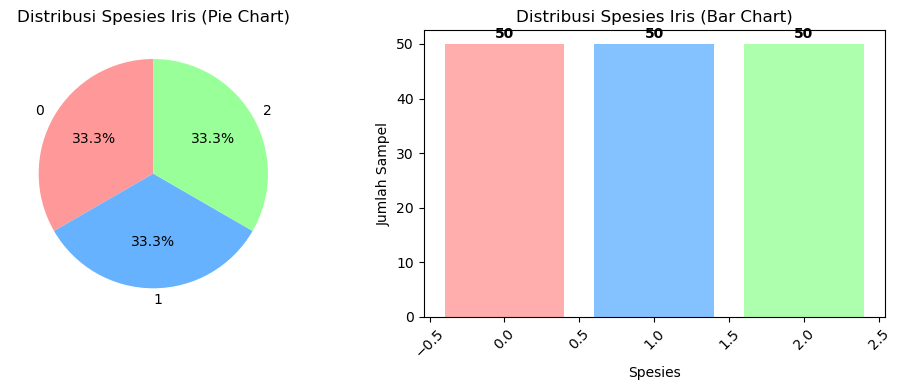

In [88]:
# Distribusi kelas
plt.figure(figsize=(10, 4))

# Pie chart
plt.subplot(1, 2, 1)
class_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                 colors=['#FF9999', '#66B2FF', '#99FF99'])
plt.title('Distribusi Spesies Iris (Pie Chart)')
plt.ylabel('')

# Bar chart
plt.subplot(1, 2, 2)
bars = plt.bar(class_counts.index, class_counts.values, 
               color=['#FF9999', '#66B2FF', '#99FF99'], alpha=0.8)
plt.title('Distribusi Spesies Iris (Bar Chart)')
plt.xlabel('Spesies')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=45)

# Tambahkan nilai di atas bar
for bar, count in zip(bars, class_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Analisis Korelasi Antar Fitur

In [89]:
# Matriks korelasi
correlation_matrix = df[features].corr()
print("=== MATRIKS KORELASI ===")
print(correlation_matrix.round(3))

=== MATRIKS KORELASI ===
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)              1.000            -0.109              0.872   
sepal width (cm)              -0.109             1.000             -0.421   
petal length (cm)              0.872            -0.421              1.000   
petal width (cm)               0.818            -0.357              0.963   

                   petal width (cm)  
sepal length (cm)             0.818  
sepal width (cm)             -0.357  
petal length (cm)             0.963  
petal width (cm)              1.000  


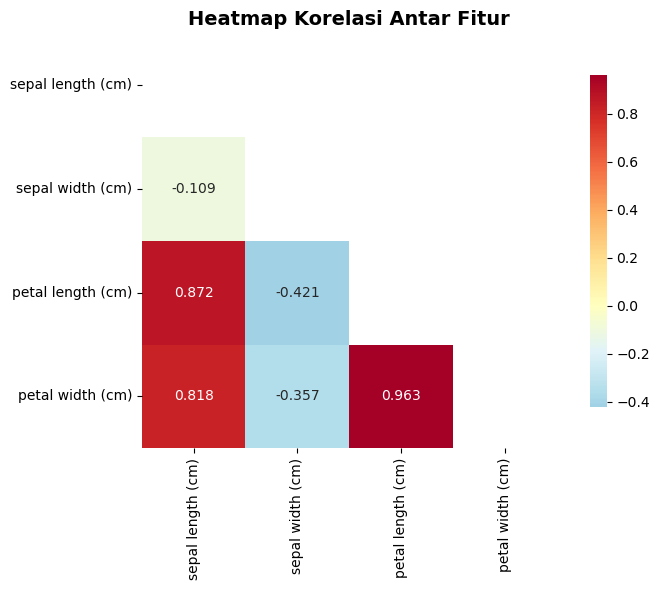

In [90]:
# Heatmap korelasi
plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0,
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8},
            mask=mask)
plt.title('Heatmap Korelasi Antar Fitur', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [91]:
# Analisis korelasi tertinggi
print("=== ANALISIS KORELASI TERTINGGI ===")
correlation_pairs = []
for i in range(len(features)):
    for j in range(i+1, len(features)):
        corr_value = correlation_matrix.iloc[i, j]
        correlation_pairs.append((features[i], features[j], corr_value))

# Sort berdasarkan nilai absolut korelasi
correlation_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

print("\n🔍 Pasangan fitur dengan korelasi tertinggi:")
for i, (feat1, feat2, corr) in enumerate(correlation_pairs[:3]):
    status = "Korelasi Positif Kuat" if corr > 0.7 else "Korelasi Positif Sedang" if corr > 0.3 else "Korelasi Lemah"
    print(f"{i+1}. {feat1.split('(')[0].strip()} vs {feat2.split('(')[0].strip()}: {corr:.3f} ({status})")

=== ANALISIS KORELASI TERTINGGI ===

🔍 Pasangan fitur dengan korelasi tertinggi:
1. petal length vs petal width: 0.963 (Korelasi Positif Kuat)
2. sepal length vs petal length: 0.872 (Korelasi Positif Kuat)
3. sepal length vs petal width: 0.818 (Korelasi Positif Kuat)


## 7. Analisis per Spesies

In [92]:
# Statistik per spesies
print("=== STATISTIK DESKRIPTIF PER SPESIES ===")
for species in df['species'].unique():
    print(f"\n📊 Spesies: {species.upper()}")
    species_data = df[df['species'] == species][features]
    print(species_data.describe().round(2))

=== STATISTIK DESKRIPTIF PER SPESIES ===


AttributeError: 'numpy.int64' object has no attribute 'upper'

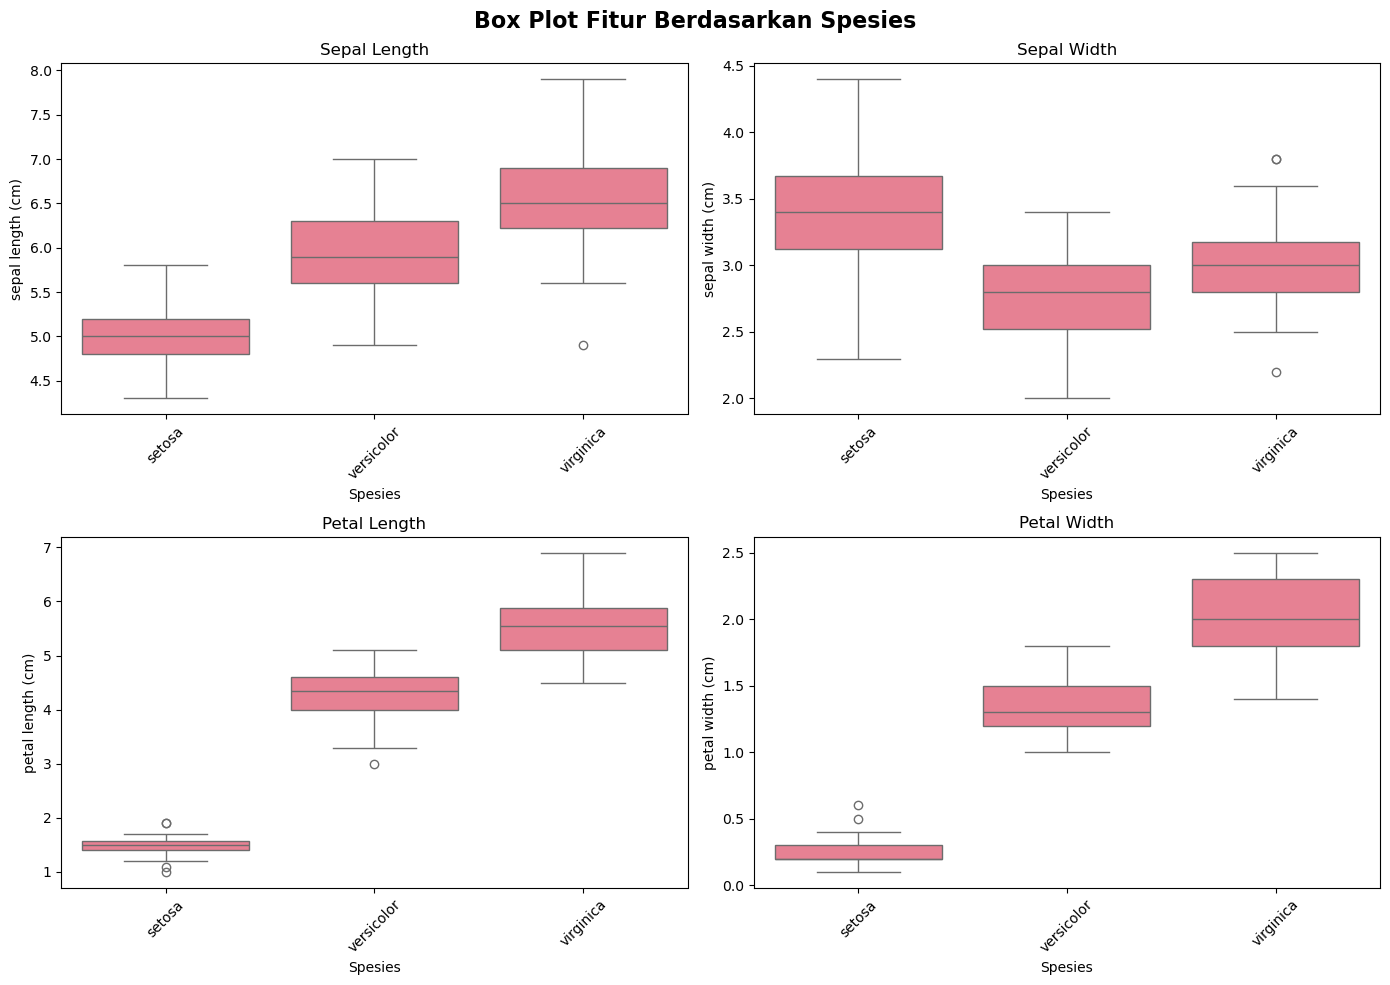

In [ ]:
# Box plot per spesies
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Box Plot Fitur Berdasarkan Spesies', fontsize=16, fontweight='bold')

for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    
    sns.boxplot(data=df, x='species_name', y=feature, ax=axes[row, col])
    axes[row, col].set_title(f'{feature.split("(")[0].strip().title()}')
    axes[row, col].set_xlabel('Spesies')
    axes[row, col].set_ylabel(feature)
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 8. Deteksi Outlier

In [ ]:
# Deteksi outlier menggunakan IQR method
print("=== DETEKSI OUTLIER (IQR METHOD) ===")

outlier_summary = {}
for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outlier_count = len(outliers)
    outlier_summary[feature] = outlier_count
    
    print(f"\n🔍 {feature.split('(')[0].strip().title()}:")
    print(f"   Range normal: {lower_bound:.2f} - {upper_bound:.2f}")
    print(f"   Jumlah outlier: {outlier_count}")
    
    if outlier_count > 0:
        print(f"   Nilai outlier: {outliers[feature].values}")

total_outliers = sum(outlier_summary.values())
print(f"\n📊 Total outlier di semua fitur: {total_outliers}")

=== DETEKSI OUTLIER (IQR METHOD) ===

🔍 Sepal Length:
   Range normal: 3.15 - 8.35
   Jumlah outlier: 0

🔍 Sepal Width:
   Range normal: 2.05 - 4.05
   Jumlah outlier: 4
   Nilai outlier: [4.4 4.1 4.2 2. ]

🔍 Petal Length:
   Range normal: -3.65 - 10.35
   Jumlah outlier: 0

🔍 Petal Width:
   Range normal: -1.95 - 4.05
   Jumlah outlier: 0

📊 Total outlier di semua fitur: 4


## 9. Kesimpulan Data Understanding

In [ ]:
print("=" * 60)
print("           📋 KESIMPULAN DATA UNDERSTANDING")
print("=" * 60)

print("\n KUALITAS DATA:")
print(f"   • Dataset lengkap: {len(df)} sampel, {len(features)} fitur")
print(f"   • Tidak ada missing values")
print(f"   • Tidak ada data duplikat")
print(f"   • Distribusi kelas seimbang (50 sampel per spesies)")

print("\n KARAKTERISTIK TIPE DATA:")
print(f"   • {quantitative_count} variabel Quantitative (Numerik)")
print(f"   • {qualitative_count} variabel Qualitative (Kategorikal)")
print(f"   • {continuous_count} variabel Continuous")
print(f"   • {discrete_count} variabel Discrete")
print(f"   • Semua fitur prediktif bertipe float64 (continuous)")

print("\n KARAKTERISTIK DISTRIBUSI:")
print(f"   • Target memiliki 3 kelas: setosa, versicolor, virginica")
print(f"   • Korelasi tertinggi: petal length vs petal width ({correlation_matrix.loc['petal length (cm)', 'petal width (cm)']:.3f})")
print(f"   • Semua fitur memiliki distribusi yang wajar")

print("\n INSIGHT PENTING:")
print("   • Petal length dan petal width sangat berkorelasi")
print("   • Sepal width memiliki korelasi terendah dengan fitur lain")
print(f"   • Total outlier terdeteksi: {total_outliers}")
print("   • Dataset ideal untuk pembelajaran machine learning")

print("\n REKOMENDASI NEXT STEPS:")
print("   • Dataset siap untuk exploratory data analysis (EDA)")
print("   • Pertimbangkan feature scaling untuk algoritma berbasis jarak")
print("   • Cocok untuk klasifikasi multiclass supervised learning")
print("   • Dapat langsung digunakan untuk modeling tanpa preprocessing")

print("\n" + "=" * 60)

           📋 KESIMPULAN DATA UNDERSTANDING

 KUALITAS DATA:
   • Dataset lengkap: 150 sampel, 4 fitur
   • Tidak ada missing values
   • Tidak ada data duplikat
   • Distribusi kelas seimbang (50 sampel per spesies)

 KARAKTERISTIK TIPE DATA:
   • 4 variabel Quantitative (Numerik)
   • 2 variabel Qualitative (Kategorikal)
   • 4 variabel Continuous
   • 2 variabel Discrete
   • Semua fitur prediktif bertipe float64 (continuous)

 KARAKTERISTIK DISTRIBUSI:
   • Target memiliki 3 kelas: setosa, versicolor, virginica
   • Korelasi tertinggi: petal length vs petal width (0.963)
   • Semua fitur memiliki distribusi yang wajar

 INSIGHT PENTING:
   • Petal length dan petal width sangat berkorelasi
   • Sepal width memiliki korelasi terendah dengan fitur lain
   • Total outlier terdeteksi: 4
   • Dataset ideal untuk pembelajaran machine learning

 REKOMENDASI NEXT STEPS:
   • Dataset siap untuk exploratory data analysis (EDA)
   • Pertimbangkan feature scaling untuk algoritma berbasis jarak
 